<a href="https://colab.research.google.com/github/elenashrlq/customer_churn_prediction_Python/blob/master/%D0%9F%D0%B0%D0%BC%D1%8F%D1%82%D0%BA%D0%B0_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Урок 1.2. Предобработка данных

## Загрузка датасета для примеров

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv("Lesson_1_insurance.csv")

## Методы для предобработки данных

### **np.log(x)** - вычисляет натуральный логарифм числа x
### **np.exp(x)** - вычисляет экспоненциальную функцию от числа или массива чисел x

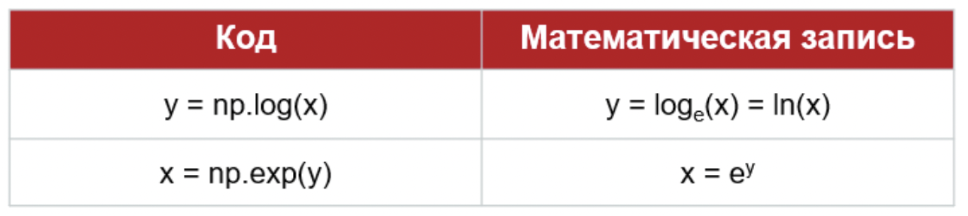

**np.log(x)**

> массив/значение с результатом вычисления натурального логарифма элементов последовательности/значения x
*   x – массив или значение, для
которого вычисляется логарифм.

**np.exp(x)**

> массив/значение с результатом вычисления экспоненты элементов последовательности/значения x
*   x – массив или значение, для которого вычисляется логарифм.


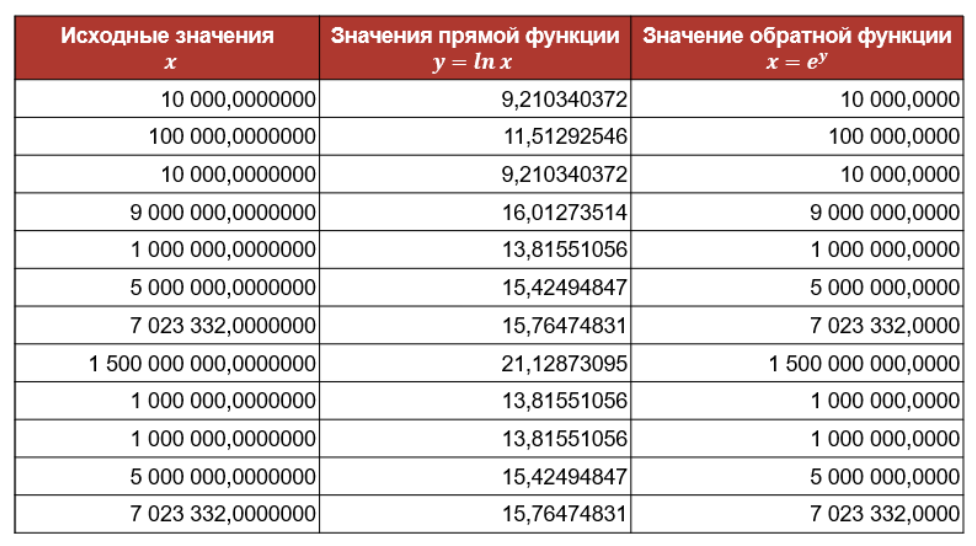

График до преобразований значений по логарифму:

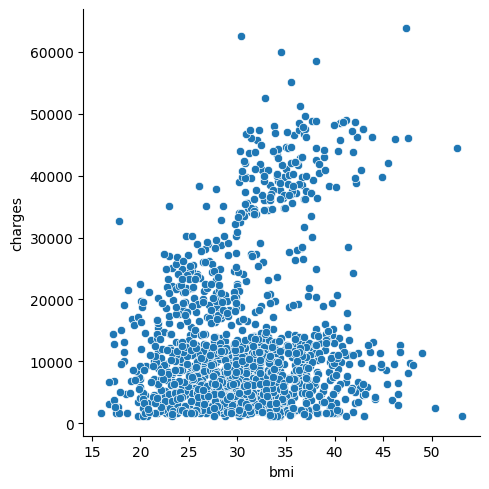

In [ ]:
sns.relplot(data=df, x="bmi", y="charges")

График после преобразований:

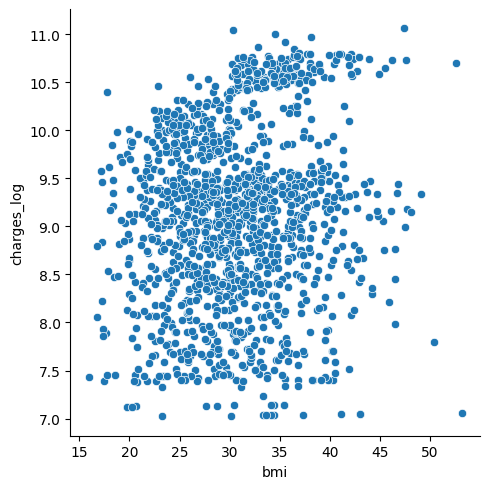

In [ ]:
df["charges_log"] = df.charges.apply(np.log)
sns.relplot(data=df, x="bmi", y="charges_log")

### **sns.relplot()** - отрисовка графика зависимостей

**sns.relplot(data=None, x=None, y=None)**

> График, на котором можно увидеть взаимосвязь между двумя или более переменными
* data – данные, на которых будет строиться график. Этот параметр принимает такие типы данных, как датафрейм, массив, последовательности,
* x, y — переменные для осей x и y графика


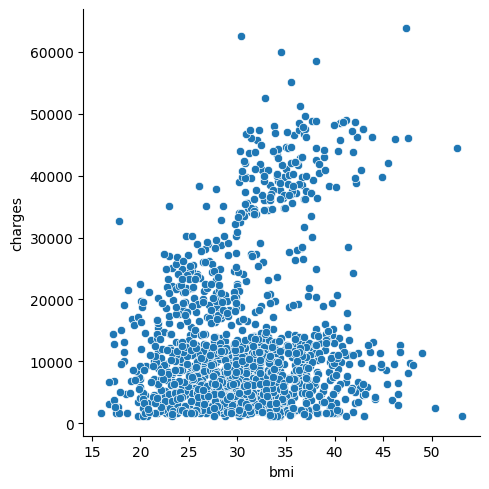

In [ ]:
sns.relplot(data=df, x="bmi", y="charges")

### **df.corr()** - возвращает датафрейм с корреляцией для каждого столбца

**df.corr(method='pearson',  numeric_only=False)**
>DataFrame с коэффициентами корреляции для каждого столбца.
* method (по умолчанию 'pearson') – метод вычисления коэффициента корреляции. Может быть 'pearson' (корреляция Пирсона), 'kendall' (ранговая корреляция Кендалла) или 'spearman' (ранговая корреляция Спирмена),
* numeric_only – параметр, позволяющий указать для каких типов данных производить расчет корреляции: для всех (numeric_only=False - это значение по умолчанию) или только по числовым (numeric_only=True).


In [ ]:
import pandas as pd
df = pd.read_csv("Lesson_1_insurance.csv")

df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.110333,0.059094,0.296249
bmi,0.110333,1.000000,-0.010929,0.196689
children,0.059094,-0.010929,1.000000,0.027631
charges,0.296249,0.196689,0.027631,1.000000


## Feature Engineering

### **pandas.Series.replace()** - функция для замены категориальных признаков на числовые значения

**pandas.Series.replace()**
> Series с заменёнными значениями; если inplace = True заменяет значения в исходной серии
*  **to_replace** (по умолчанию None) – значение или список значений, которые нужно заменить. Если не указано, то заменяются все значения, равные NaN,
*  **value** (по умолчанию None) –  новое значение, на которое заменяются указанные значения to_replace. Если не указано, то значения остаются неизменными,
*  **inplace** (по умолчанию False) –  если True, то замена производится в исходной серии, иначе создаётся новая серия с заменёнными значениями.


In [ ]:
sex_to_replace = {"male": 0, "female": 1, "Unknown": -1}
smoker_to_replace = {"no": 0, "yes": 1, "Unknown": -1}
df["sex"] = df["sex"].replace(sex_to_replace)
df["smoker"] = df["smoker"].replace(smoker_to_replace)

### **pandas.Series.get_dummies()** - используется для преобразования категориальных данных в "фиктивные" переменные

**pandas.get_dummies(data, prefix=None, prefix_sep='_')**
> DataFrame с dummy (фиктивными) переменными. Фиктивная переменная принимает значение 1 или 0 в зависимости от того, присутствует ли категория в исходном значении
* **data** – DataFrame или Series, для которого нужно создать фиктивные переменные,
* **prefix** (по умолчанию None) – префикс, добавляемый к именам новых столбцов. Если не указано, то используется имя исходного столбца,
* **prefix_sep** (по умолчанию '_') – разделитель между префиксом и именем категории.

P.S. Каждая переменная преобразуется в столько переменных 0/1, сколько имеется различных значений.


In [ ]:
pd.get_dummies(df.region)

,northeast,northwest,southeast,southwest
0,True,False,False,False
1,False,False,True,False
2,False,False,True,False
3,False,False,False,True
4,False,False,True,False
...,...,...,...,...
1458,False,True,False,False
1459,False,True,False,False
1460,False,True,False,False
1461,False,False,True,False


### **pandas.Series.concat()** - функция объединяет значения

**pandas.concat(objs, axis=0)**
> DataFrame с объединёнными данными
*  **objs** – список объектов DataFrame или Series для объединения,
*  **axis** (по умолчанию 0) – ось, вдоль которой объединяются объекты. Может быть 0 (горизонтальное объединение) или 1 (вертикальное объединение),


In [ ]:
region_cat = pd.get_dummies(df.region)
df = pd.concat([df, region_cat], axis = 1)
df.drop("region", inplace = True, axis = 1)

In [ ]:
df

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,37.0,0.0,34.200,1.0,1.0,39047.28500,True,False,False,False
1,35.0,1.0,43.340,2.0,0.0,5846.91760,False,False,True,False
2,62.0,0.0,NaN,50.0,NaN,NaN,False,False,True,False
3,53.0,1.0,26.700,2.0,0.0,11150.78000,False,False,False,True
4,59.0,1.0,27.830,3.0,0.0,14001.28670,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
1458,31.0,1.0,21.755,0.0,0.0,4134.08245,False,True,False,False
1459,56.0,0.0,33.630,0.0,1.0,43921.18370,False,True,False,False
1460,34.0,1.0,26.410,1.0,0.0,5385.33790,False,True,False,False
1461,54.0,1.0,31.240,0.0,0.0,10338.93160,False,False,True,False
